In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Need to import required library

In [90]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Need to read csv file which will show the data. This dataset is related to loan application which shows the borrower information and loan information. 

In [91]:
df.shape

(614, 13)

In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [95]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [96]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [97]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [98]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

In [99]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [100]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

Need to remove null values from the dataset to proceed further.

In [101]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [102]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Need to check the categorical and numerical data available in dataset, we need to convert the categorical data into numerical data.

In [104]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

In [105]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Covert the target variable into numerical data to get the result

In [106]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [107]:
df.drop(['Gender'], axis=1, inplace=True)

In [108]:
df.drop(['Married'], axis=1, inplace=True)

In [109]:
df.drop(['Dependents'], axis=1, inplace=True)

In [110]:
df.drop(['Education'], axis=1, inplace=True)

Drop the unnecessary data from the dataset so that our prediction will be near by original data

In [111]:
df=pd.get_dummies(df).astype(int)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,120,360,1,1,1,0,0,0,1
1,4583,1508,128,360,1,0,1,0,1,0,0
2,3000,0,66,360,1,1,0,1,0,0,1
3,2583,2358,120,360,1,1,1,0,0,0,1
4,6000,0,141,360,1,1,1,0,0,0,1


Created the dummy dataset to convert the categorical data into numerical data set

In [112]:
df.skew()

ApplicantIncome            6.539513
CoapplicantIncome          7.491530
LoanAmount                 2.745407
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Loan_Status               -0.809998
Self_Employed_No          -2.159796
Self_Employed_Yes          2.159796
Property_Area_Rural        0.919670
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

In [113]:
df['ApplicantIncome'] = np.cbrt(df['ApplicantIncome'])

In [114]:
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])

In [115]:
df['LoanAmount'] = np.cbrt(df['LoanAmount'])

In [116]:
df['Loan_Amount_Term'] = np.cbrt(df['Loan_Amount_Term'])

In [117]:
df['Credit_History'] = np.cbrt(df['Credit_History'])

In [118]:
df['Property_Area_Rural'] = np.cbrt(df['Property_Area_Rural'])

In [119]:
df.skew()

ApplicantIncome            2.083638
CoapplicantIncome          0.196729
LoanAmount                 0.874139
Loan_Amount_Term          -3.578100
Credit_History            -2.021971
Loan_Status               -0.809998
Self_Employed_No          -2.159796
Self_Employed_Yes          2.159796
Property_Area_Rural        0.919670
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

Checked the skewness of the dataset and reduced the skewness of the dataset

<AxesSubplot:>

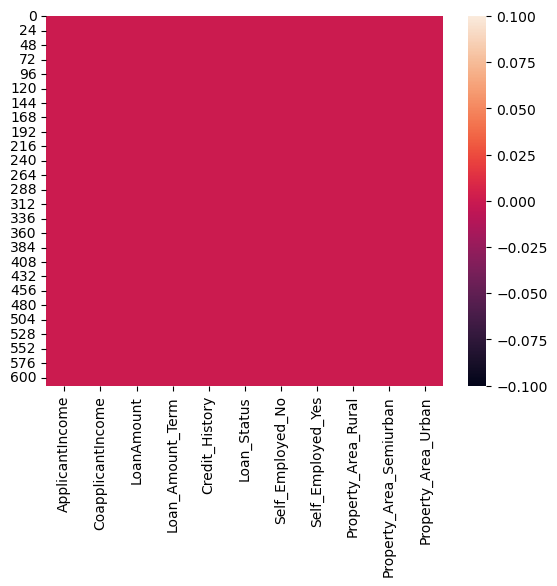

In [120]:
sns.heatmap(df.isnull())

Created the heatmap for the null values

4.932424    42
4.791420    17
4.641589    15
5.428835    12
5.718479    12
            ..
6.214465     1
5.981424     1
3.892996     1
5.495865     1
6.324704     1
Name: LoanAmount, Length: 203, dtype: int64


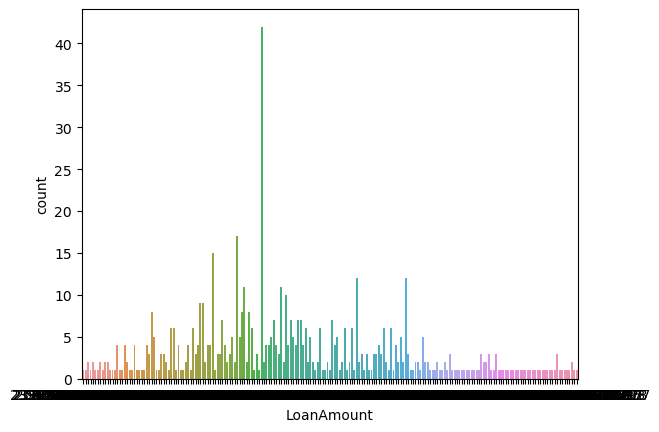

In [121]:
ax=sns.countplot(x='LoanAmount', data=df)
print(df['LoanAmount'].value_counts())

Created countplot for the loan amount

1.0    525
0.0     89
Name: Credit_History, dtype: int64


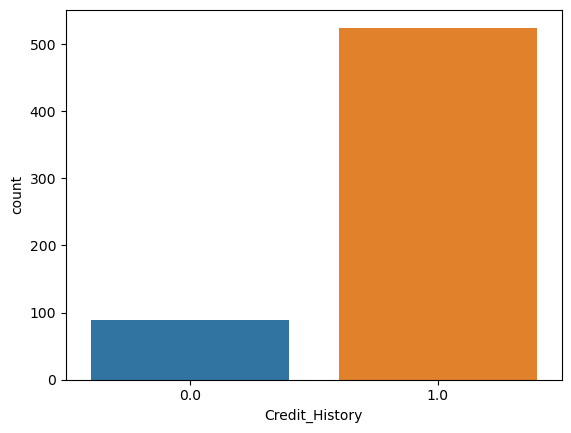

In [122]:
ax=sns.countplot(x='Credit_History', data=df)
print(df['Credit_History'].value_counts())

Created the countplot for the credit history

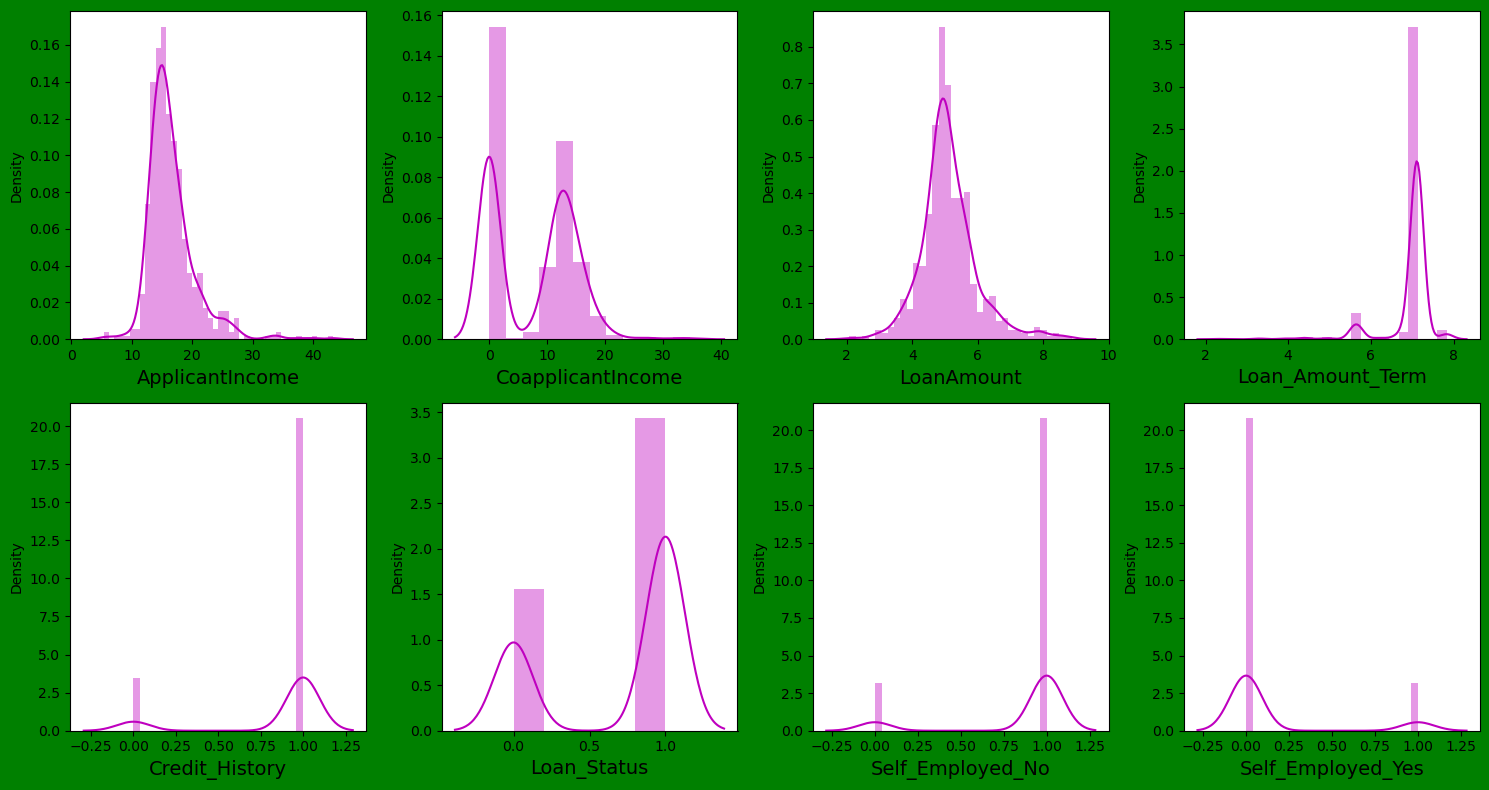

In [125]:
plt.figure(figsize=(15,8), facecolor= "green")
plotnumber=1
for col in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Created the distplot from the dataset to check the skewness of the dataset

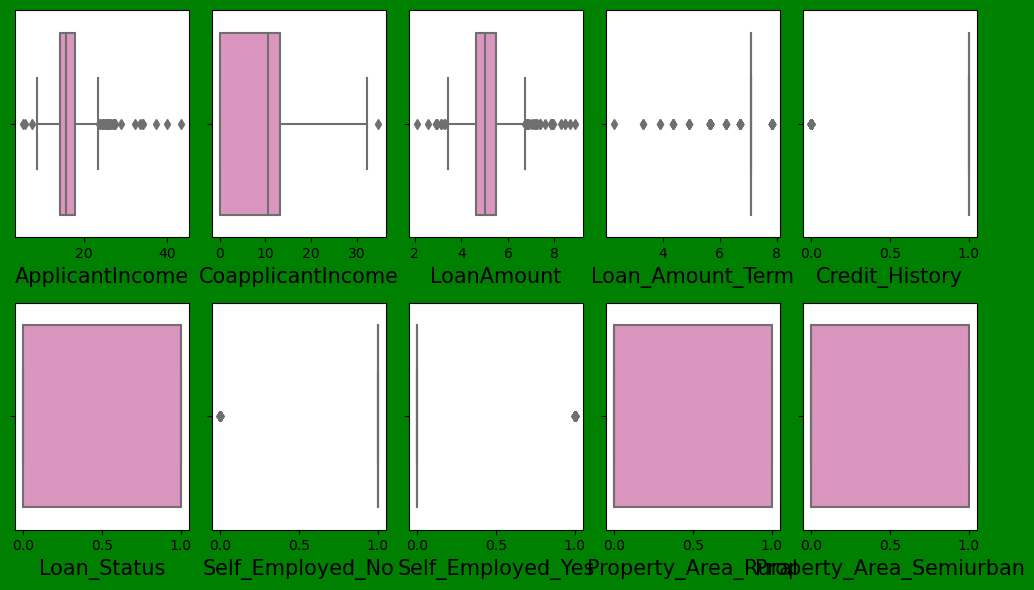

In [126]:
plt.figure(figsize=(10,6), facecolor= 'green')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(2,5, plotnumber)
        sns.boxplot(df[col], palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
    plt.tight_layout()

Created the boxplot from the dataset to verify the outliers and skewness of the dataset

In [127]:
cor= df.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.325064,0.555201,-0.023825,0.009937,0.004341,-0.188492,0.188492,0.023176,-0.003154,-0.019160
CoapplicantIncome,-0.325064,1.000000,0.161207,0.000284,0.005038,0.033581,0.074736,-0.074736,0.056677,-0.021331,-0.032791
LoanAmount,0.555201,0.161207,1.000000,0.070519,-0.010011,-0.036973,-0.114934,0.114934,0.068212,0.003639,-0.069738
Loan_Amount_Term,-0.023825,0.000284,0.070519,1.000000,-0.010393,-0.012642,0.029913,-0.029913,0.043406,0.051486,-0.095160
Credit_History,0.009937,0.005038,-0.010011,-0.010393,1.000000,0.540556,0.001550,-0.001550,-0.020906,0.035976,-0.016934
Loan_Status,0.004341,0.033581,-0.036973,-0.012642,0.540556,1.000000,0.003700,-0.003700,-0.100694,0.136540,-0.043621
Self_Employed_No,-0.188492,0.074736,-0.114934,0.029913,0.001550,0.003700,1.000000,-1.000000,-0.022065,-0.008710,0.030338
Self_Employed_Yes,0.188492,-0.074736,0.114934,-0.029913,-0.001550,-0.003700,-1.000000,1.000000,0.022065,0.008710,-0.030338
Property_Area_Rural,0.023176,0.056677,0.068212,0.043406,-0.020906,-0.100694,-0.022065,0.022065,1.000000,-0.501646,-0.449168
Property_Area_Semiurban,-0.003154,-0.021331,0.003639,0.051486,0.035976,0.136540,-0.008710,0.008710,-0.501646,1.000000,-0.547574


Checked the corelation of the dataset

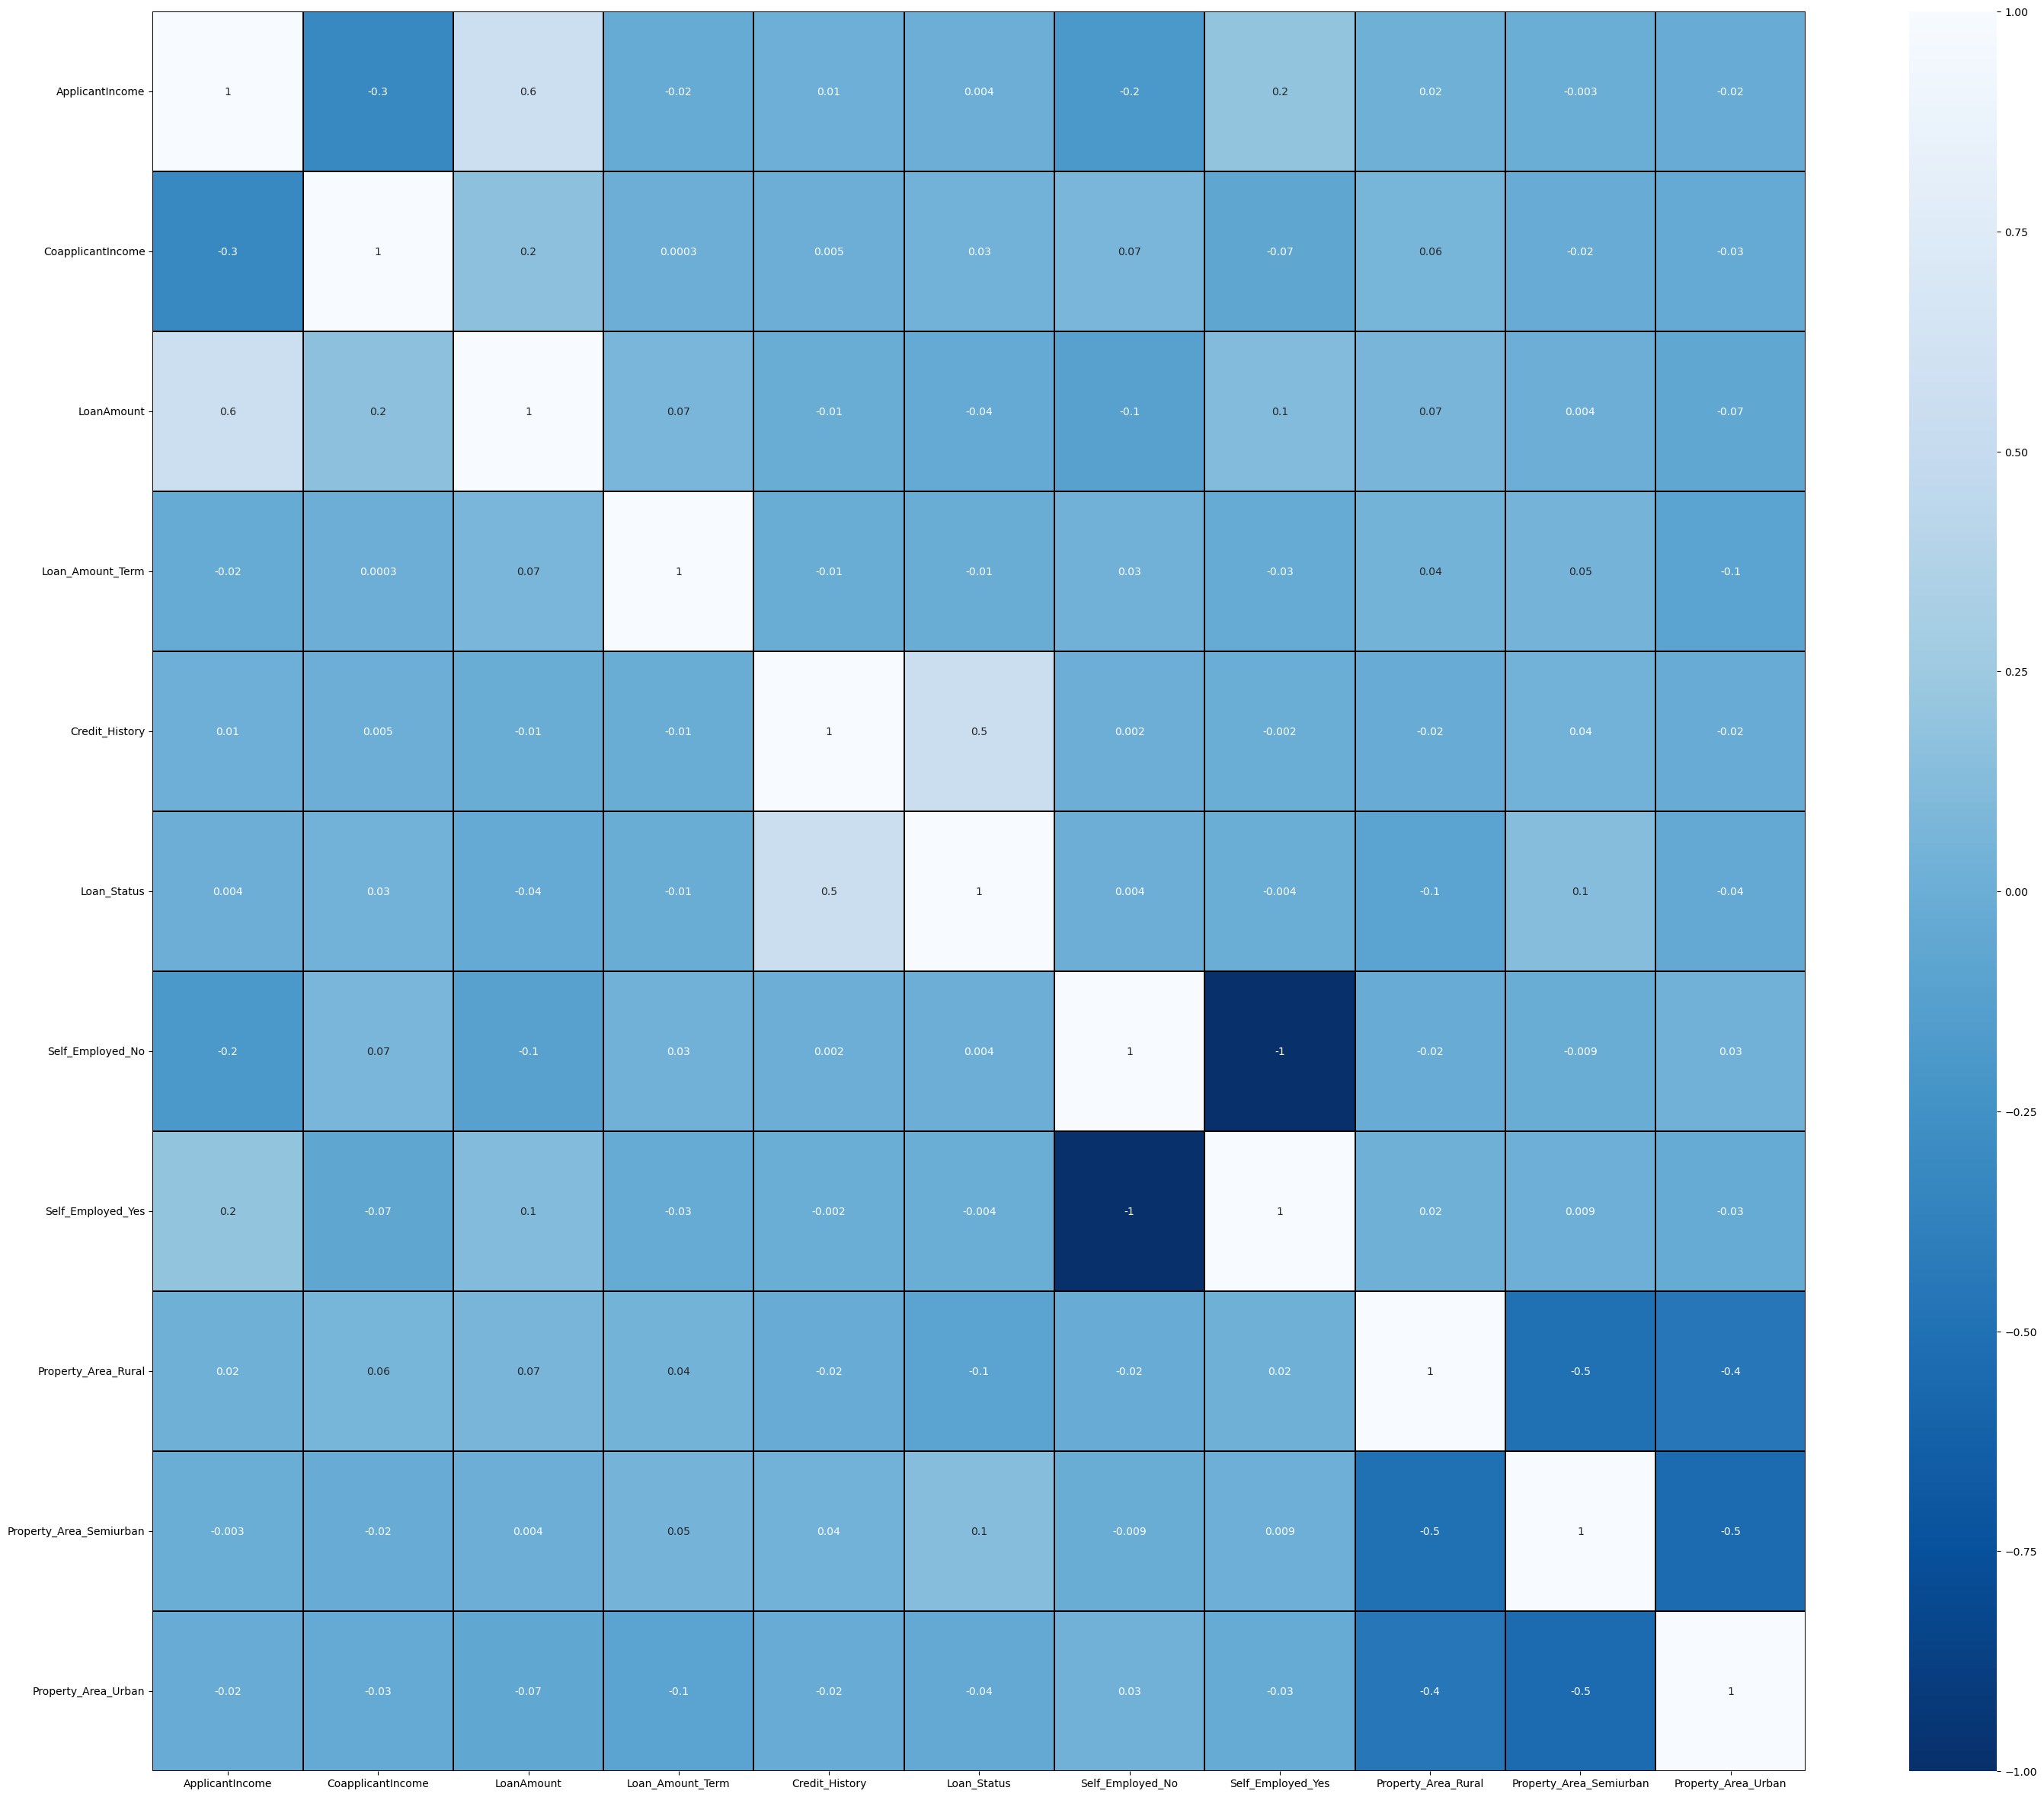

In [128]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black", annot= True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

Here we are checking the Correlation with the heatmap

In [129]:
y=df['Loan_Status']
x=df.drop('Loan_Status',axis=1)

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Here we are creating the various ypes of models for the dataset to verify tha prediction

In [131]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [132]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

0.7479674796747967
[[19 24]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



In [133]:
GB=GradientBoostingClassifier() 
GB.fit(X_train, y_train)
predGB=GB.predict(X_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.7317073170731707
[[17 26]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123



In [134]:
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train) 
predET=ET.predict(X_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7723577235772358
[[21 22]
 [ 6 74]]
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        43
           1       0.77      0.93      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.72       123
weighted avg       0.77      0.77      0.76       123



In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 
              'random_state':[10, 50, 1000], 
              'max_depth':[0, 10, 20],
            'n_jobs':[-2, -1, 1],
              'n_estimators':[50, 100, 200, 300]}

In [137]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [138]:
import joblib
joblib.dump(ET,"Loan_Status.pkl")

['Loan_Status.pkl']

In [139]:
model = joblib.load("Loan_Status.pkl")
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [140]:
a = np.array(y_test) 
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
118,0,1
119,0,1
120,1,1
121,1,1


Finally we have predicted the loan status from the loan dataset. Prediction is almost nearby the original data